# 2. Исследовательский анализ данных (EDA)

**Цель:** детально изучить структуру очищенных данных, выявить скрытые закономерности в поведении пользователей и подготовить базу для проверки статистических гипотез.

**Этапы:**
- импорт очищенных данных и проверка целостности;
- изучение плотности данных для ключевых метрик (дистанция, время, стоимость);
- корреляционный анализ и выявление зависимостей;
- анализ сезонности и выявление пиковых нагрузок (по часам, дням недели и месяцам);
- сегментация пользователей по возрасту, полу, региону проживания и активности;
- формирование выводов для этапа статистического тестирования.

---

### Импорт очищенных данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH_CLEAN = '../data/clean'

sns.set_theme(style="darkgrid", palette="deep")

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

In [3]:
df = pd.read_parquet(f"{PATH_CLEAN}/kicksharing_clean.parquet")

# быстрый просмотр
print(f"Размер очищенного датасета: {df.shape}\n")
print(df.info())

Размер очищенного датасета: (357110, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357110 entries, 0 to 357109
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 357110 non-null  int64         
 1   party_rk                 357110 non-null  int64         
 2   gender_cd                357110 non-null  category      
 3   age                      357110 non-null  int8          
 4   education_level_cd       357110 non-null  category      
 5   marital_status_cd        357110 non-null  category      
 6   lvn_state_nm             357110 non-null  category      
 7   minute_cost              357110 non-null  float32       
 8   activation_cost          357110 non-null  float32       
 9   hold_amount              357110 non-null  float32       
 10  transport_model          357110 non-null  category      
 11  distance_km              357110 non-

Структура и типы данных сохранены.

In [4]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,avg_speed_kmh,cashback_rate_rub,cashback_rate_bns,hour,day_of_week,month
0,252618395,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,0.070,2024-04-17 10:43:29,2024-04-17 10:43:34.133897,2024-04-17 10:45:22.547000,3,2024-04-17 10:43:34.133897,64.98,0.0,0.0,1.807,2.317,0.0,0.0,10,2,4
1,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,0.806,2024-04-17 16:45:16,2024-04-17 16:45:20.641980,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,0.0,6.096,7.930,0.0,0.0,16,2,4
2,252632694,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,0.046,2024-04-17 16:47:59,2024-04-17 16:48:04.538852,2024-04-17 16:49:47.783760,3,2024-04-17 16:48:04.538852,65.98,0.0,0.0,1.721,1.617,0.0,0.0,16,2,4
3,252613575,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,0.064,2024-04-17 16:50:58,2024-04-17 16:51:01.965350,2024-04-17 16:52:32.398000,3,2024-04-17 16:51:01.965350,65.98,0.0,0.0,1.507,2.567,0.0,0.0,16,2,4
4,252629528,21817314,F,30,GRD,UNM,МОСКОВСКАЯ ОБЛ,7.49,50.0,300.0,SL,0.055,2024-04-19 10:32:08,2024-04-19 10:32:15.964200,2024-04-19 10:38:11.978319,3,2024-04-19 10:32:15.964200,94.94,0.0,0.0,5.934,0.558,0.0,0.0,10,4,4


---

### Базовые метрики и статистики

In [5]:
# описательная статистика по числовым столбцам
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_rk,357110.0,288752441.793,252611203.0,261319566.25,270153104.5,343265708.75,356252785.0,38067547.203
party_rk,357110.0,596645129.584,14717.0,294130444.0,610515824.0,863892569.25,1301075452.0,330882580.247
age,357110.0,31.544,12.0,24.0,31.0,37.0,94.0,9.413
minute_cost,357110.0,7.286,2.5,6.49,7.49,8.23,19.99,1.291
activation_cost,357110.0,42.591,0.0,30.0,50.0,50.0,50.0,12.023
hold_amount,357110.0,300.0,300.0,300.0,300.0,300.0,300.0,0.0
distance_km,357110.0,2.428,0.01,1.033,1.769,3.034,23.785,2.264
created_dttm,357110,2024-08-18 07:23:36.240794112,2024-04-17 10:43:29,2024-07-20 15:47:16.500000,2024-08-22 16:53:45,2024-09-16 05:35:10.249999872,2024-10-21 17:18:04,NaN
book_start_dttm,357110,2024-08-18 07:23:42.369848320,2024-04-17 10:43:34.133897,2024-07-20 15:47:20.884478208,2024-08-22 16:53:51.472391936,2024-09-16 05:35:13.989500160,2024-10-21 17:18:07.715000,NaN
book_end_dttm,357110,2024-08-18 07:35:07.918744832,2024-04-17 10:45:22.547000,2024-07-20 16:03:35.878128640,2024-08-22 17:07:09.280653056,2024-09-16 05:45:39.653933568,2024-10-21 17:23:06.640943,NaN


In [6]:
metrics = {
    'avg_price': df['nominal_price_rub_amt'].mean(),
    'median_price': df['nominal_price_rub_amt'].median(),
    'avg_trip_duration': df['trip_duration_min'].mean(),
    'median_trip_duration': df['trip_duration_min'].median(),
    'avg_distance_km': df['distance_km'].mean(),
    'median_distance_km': df['distance_km'].median(),
}

for key, value in metrics.items():
    print(f"{key}: {value}")

avg_price: 128.09307861328125
median_price: 105.91999816894531
avg_trip_duration: 11.425814628601074
median_trip_duration: 8.03392219543457
avg_distance_km: 2.427544593811035
median_distance_km: 1.769460678100586


- *Средний чек за поездку (AOV):* 128.09 руб.
- *Средняя длительность поездки:* 11.43 мин.
- *Средняя дистанция поездки:* 2.43 км.

---

### Распределение количественных признаков

Рассмотрим распределения стоимости за минуту поездки, дистанции, цены поездки и длительности:

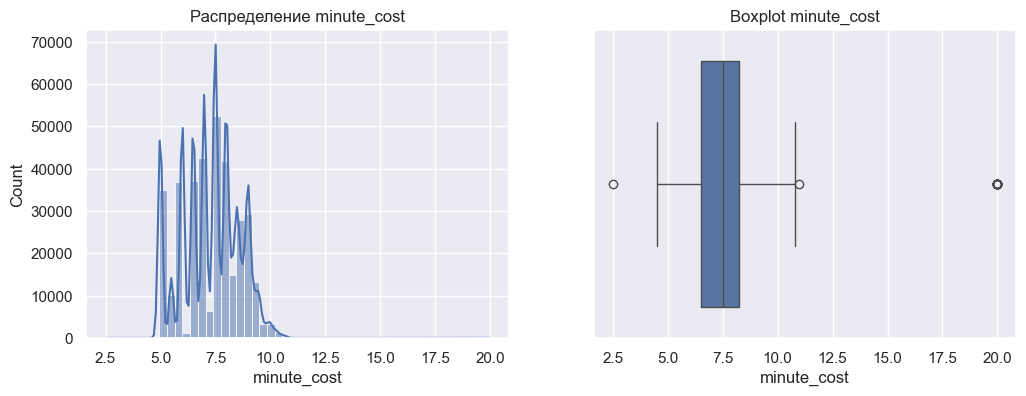

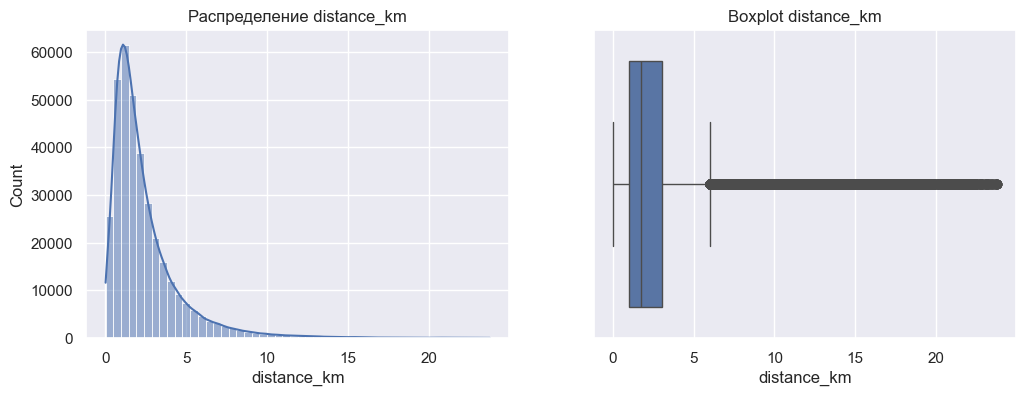

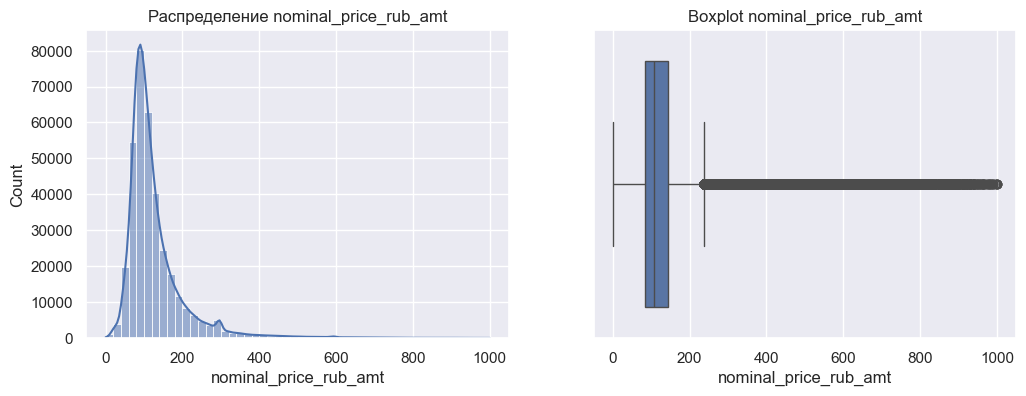

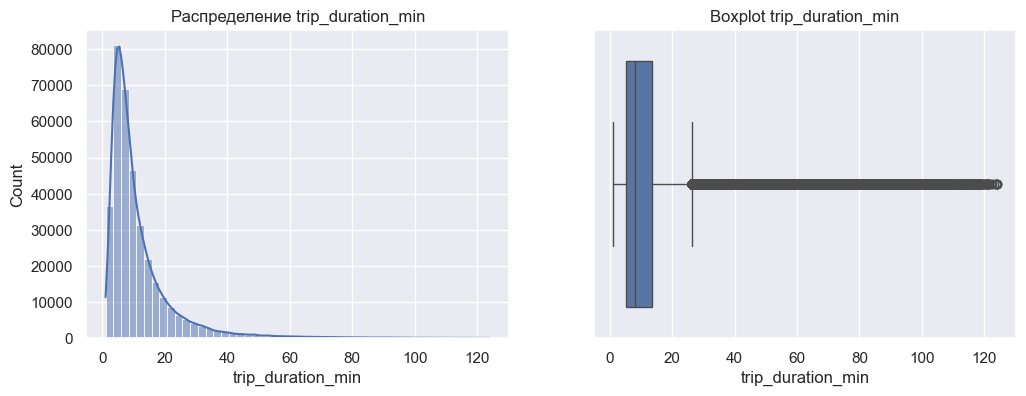

In [7]:
# распределение количественных признаков поездок

columns = ['minute_cost', 'distance_km', 'nominal_price_rub_amt', 'trip_duration_min']

for col in columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Распределение {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.title(f"Boxplot {col}")

    plt.show()

**Анализ распределений:**

1. Стоимость минуты, скорее всего, зависит от региона и сезонности. Необходимо рассмотреть этот признак получше.
2. Распределения дистанции `distance_km`, цены `nominal_price_rub_amt` и длительности `trip_duration_min` имеют ярко выраженную **правостороннюю скошенность**. Основная масса поездок — короткие и недорогие, однако наличие хвоста смещает среднее значение в большую сторону относительно медианы, что подтверждает расчёты из 1-го ноутбука.

In [8]:
# метрики количественных признаков

metrics = {
    'avg_minute_cost': df['minute_cost'].mean(),
    'median_minute_cost': df['minute_cost'].median(),
    'avg_distance_km': df['distance_km'].mean(),
    'median_distance_km': df['distance_km'].median(),
    'avg_price': df['nominal_price_rub_amt'].mean(),
    'median_price': df['nominal_price_rub_amt'].median(),
    'avg_trip_duration': df['trip_duration_min'].mean(),
    'median_trip_duration': df['trip_duration_min'].median()
}

for key, value in metrics.items():
    print(f"{key}: {value}")

avg_minute_cost: 7.286141395568848
median_minute_cost: 7.489999771118164
avg_distance_km: 2.427544593811035
median_distance_km: 1.769460678100586
avg_price: 128.09307861328125
median_price: 105.91999816894531
avg_trip_duration: 11.425814628601074
median_trip_duration: 8.03392219543457


Цена поездки `nominal_price_rub_amt` — это сумма стоимости активации `activation_cost` и произведения длительности поездки `trip_duration_min` на стоимость минуты `minute_cost`.

Другими словами,
$$nominal\_price\_rub\_amt = activation\_cost + trip\_duration\_min * minute\_cost$$

Рассчитаем **эффективную стоимость** минуты, чтобы оценить вклад фиксированной стоимости активации в итоговый чек:

In [9]:
df['effective_minute_cost'] = df['nominal_price_rub_amt'] / df['trip_duration_min']
print(df[['effective_minute_cost', 'minute_cost']].describe())

       effective_minute_cost  minute_cost
count             357110.000   357110.000
mean                  14.381        7.286
std                    6.393        1.291
min                    0.000        2.500
25%                   10.023        6.490
50%                   13.016        7.490
75%                   17.187        8.230
max                   66.176       19.990


**Наблюдение:**

Пользователь в среднем видит тариф в 7,3 руб/мин, а **в реальности платит 14,4 руб/мин**. Это разница почти в 100%!

То есть за счёт цены старта (активации) компания фактически **удваивает стоимость минуты**, которую видит пользователь.

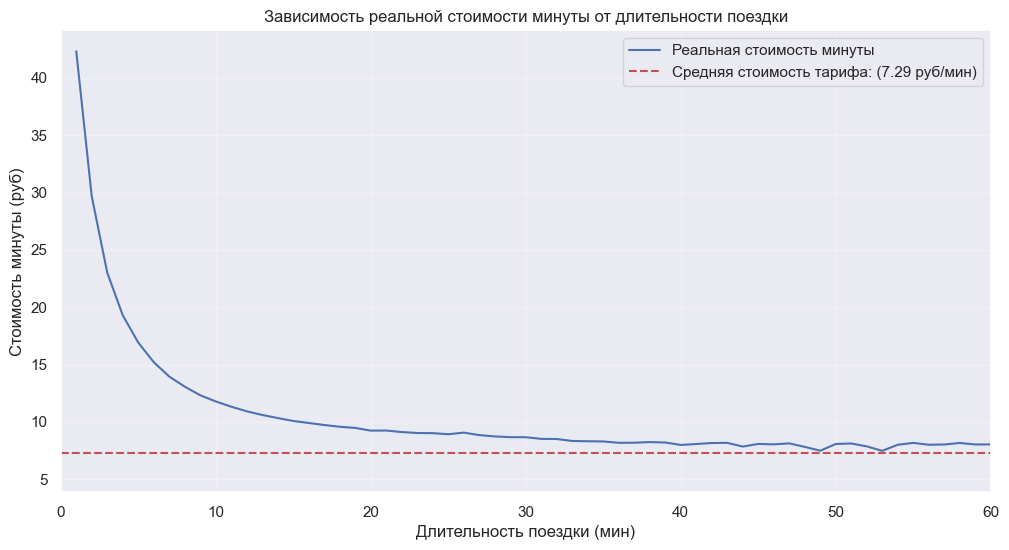

In [10]:
# бины для графика
df['duration_int'] = df['trip_duration_min'].round()

grouped_data = df.groupby('duration_int')['effective_minute_cost'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='duration_int', y='effective_minute_cost', label='Реальная стоимость минуты')

# добавим на график среднюю стоимость минуты (тариф, который видит пользователь)
plt.axhline(y=df['minute_cost'].mean(), color='r', linestyle='--', label=f'Средняя стоимость тарифа: ({df['minute_cost'].mean():.2f} руб/мин)')

plt.title('Зависимость реальной стоимости минуты от длительности поездки')
plt.xlabel('Длительность поездки (мин)')
plt.ylabel('Стоимость минуты (руб)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 60)
plt.show()

**Анализ:**

1. На графике отчетливо видна гиперболическая зависимость. На коротких поездках (1-7 мин) реальная стоимость минуты достигает 15-30 рублей, что в 2-4 раза выше заявленного для пользователя тарифа.
2. Реальная стоимость минуты стремится к базовому тарифу (7.29 руб/мин) только при достижении поездки длительностью 20+ минут.

**Вывод:** бизнес-модель кикшеринга максимально эффективно монетизирует короткие поездки.

---

### Корреляционный анализ

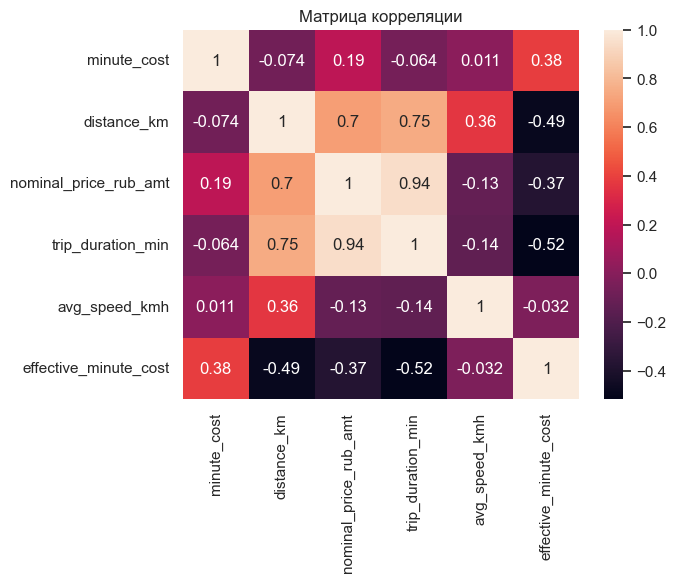

In [11]:
# матрица корреляции признаков
sns.heatmap(df[
                ['minute_cost', 'distance_km', 'nominal_price_rub_amt', 'trip_duration_min', 'avg_speed_kmh', 'effective_minute_cost']
            ].corr(), annot=True)
plt.title('Матрица корреляции')
plt.show()

**Анализ:**

- Почти линейная зависимость (0.94) между ценой `nominal_price_rub_amt` и временем `trip_duration_min`. Это логично (обусловлено поминутной оплатой).
- Сильная связь (0.75) между дистанцией `distance_km` и временем `trip_duration_min`. Отражает естественную зависимость.
- Сильная связь (0.7) между дистанцией `distance_km` и ценой `nominal_price_rub_amt`. Тоже видна естественная зависимость.
- Отрицательная корреляция (-0.52) между `effective_minute_cost` и `trip_duration_min`. Чем дольше поездка, тем ниже эффективная цена минуты.

> Матрица корреляции Пирсона отражает линейные взаимосвязи. Нелинейные зависимости (как в случае с эффективной стоимостью минуты, где видна гиперболическая зависимость) могут иметь более сильную фактическую связь, чем показывает коэффициент.

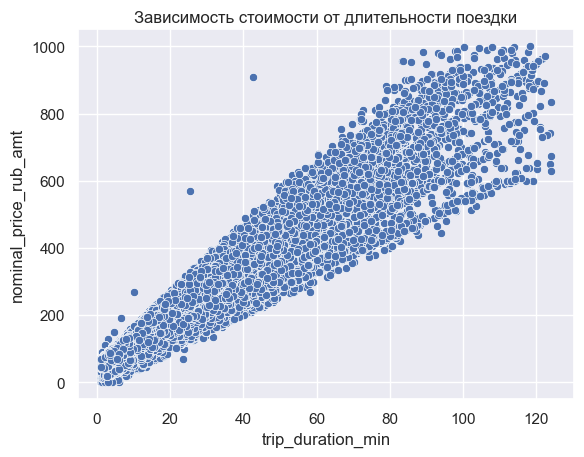

In [12]:
# корреляция стоимости и длительности поездки

sns.scatterplot(data=df, x='trip_duration_min', y='nominal_price_rub_amt')
plt.title('Зависимость стоимости от длительности поездки')
plt.show()

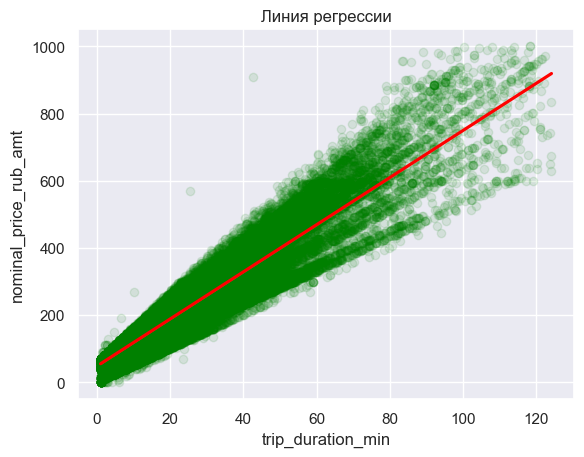

In [13]:
sns.regplot(data=df, x='trip_duration_min', y='nominal_price_rub_amt',
            scatter_kws={'color': 'green', 'alpha': 0.1}, line_kws={'color': 'red'})
plt.title("Линия регрессии")
plt.show()

---

### Анализ сезонности и выявление пиковых нагрузок

Исследуем активность пользователей во времени:

- пиковые часы в течение дня;
- в какие дни недели поездки наиболее популярны;
- как распределены поездки по месяцам (сезонность);
- одинаковое ли поведение пользователей в будние и выходные дни.

In [14]:
df['dow_name'] = df['local_book_start_dttm'].dt.day_name().astype('category')

df['month_name'] = df['local_book_start_dttm'].dt.month_name().astype('category')

df.sample(5, random_state=42)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,avg_speed_kmh,cashback_rate_rub,cashback_rate_bns,hour,day_of_week,month,effective_minute_cost,duration_int,dow_name,month_name
345135,354548079,727554319,M,50,Unknown,Unknown,Г МОСКВА,8.34,50.0,300.0,SL,1.143,2024-10-15 04:13:02,2024-10-15 04:13:05.782000,2024-10-15 04:17:37.972861,3,2024-10-15 04:13:05.782000,91.70,49.52,0.0,4.537,15.112,0.54,0.0,4,1,10,20.214,5.0,Tuesday,October
243275,275214038,256370869,M,36,PGR,MAR,МОСКОВСКАЯ ОБЛ,8.31,50.0,300.0,SL,1.711,2024-09-09 15:07:30,2024-09-09 15:07:34.161000,2024-09-09 15:13:19.066534,3,2024-09-09 15:07:34.161000,99.86,24.00,0.0,5.748,17.857,0.24,0.0,15,0,9,17.372,6.0,Monday,September
153190,267911104,705714558,M,23,Unknown,Unknown,Unknown,5.99,40.0,300.0,Max,6.196,2024-08-14 19:58:45,2024-08-14 19:58:48.009870,2024-08-14 20:11:56.498683,3,2024-08-14 19:58:48.009870,123.86,12.39,0.0,13.141,28.287,0.10,0.0,19,2,8,9.425,13.0,Wednesday,August
73264,259723390,368641059,M,41,UGR,CIV,НИЖЕГОРОДСКАЯ ОБЛ,4.99,50.0,300.0,E,3.913,2024-07-14 01:02:14,2024-07-14 01:02:18.050360,2024-07-14 01:19:01.147578,3,2024-07-14 01:02:18.050360,134.83,20.22,0.0,16.718,14.045,0.15,0.0,1,6,7,8.065,17.0,Sunday,July
299335,349108369,329639525,M,30,Unknown,Unknown,РЕСП БАШКОРТОСТАН,8.49,40.0,300.0,Max,1.355,2024-09-25 16:36:39,2024-09-25 16:36:43.564000,2024-09-25 16:41:41.849104,5,2024-09-25 18:36:43.564000,82.45,24.74,0.0,4.971,16.353,0.30,0.0,18,2,9,16.585,5.0,Wednesday,September


Рассмотрим распределение количества поездок по часам, дням недели и месяцам:

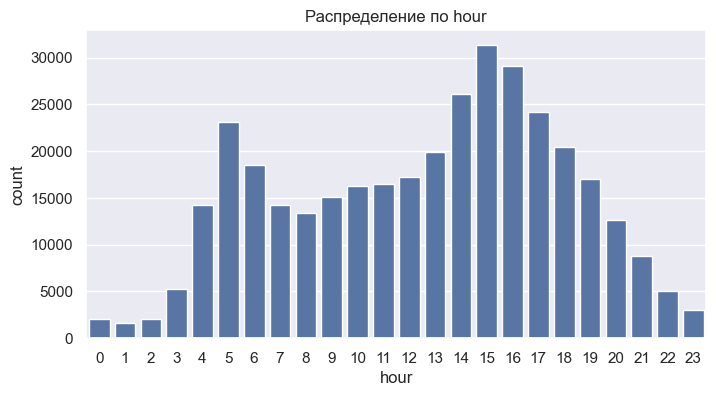

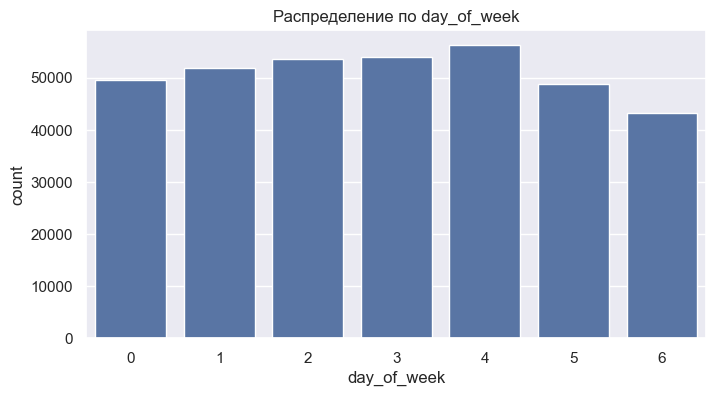

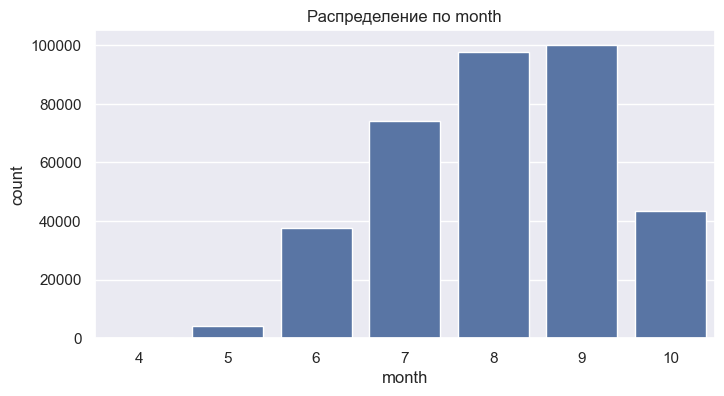

In [15]:
date_col1 = ['hour', 'day_of_week', 'month']

for col in date_col1:
    plt.figure(figsize=(8, 4))
    sns.barplot(df[col].value_counts())
    plt.title(f'Распределение по {col}')
    plt.show()

**Наблюдения:**

- Видно два чётких пика: 5-6 утра и 14-17 вечера.
- Активность растёт с понедельника, достигая пика в пятницу, затем спад в субботу-воскресенье.
- Больше всего поездок в августе и сентябре.

In [16]:
date_col2 = ['hour', 'dow_name', 'month_name']

for col in date_col2:
    agg = df.groupby(by=col, observed=True).agg(
        rides=('order_rk', 'count'),
        avg_price=('nominal_price_rub_amt', 'mean'),
        avg_distance=('distance_km', 'mean'),
        avg_duration=('trip_duration_min', 'mean'),
        avg_revenue=('nominal_price_rub_amt', 'sum')
    ).sort_values('rides', ascending=False)

    display(agg.style.format({'avg_revenue': '{:,.0f}'}))

,rides,avg_price,avg_distance,avg_duration,avg_revenue
hour,,,,,
15,31361,136.521439,2.566403,11.972989,"4,281,449"
16,29115,135.893250,2.461669,11.847558,"3,956,532"
14,26084,135.154388,2.548064,12.071368,"3,525,367"
17,24142,135.745041,2.485736,12.031885,"3,277,157"
5,23069,106.888023,2.210362,8.969793,"2,465,800"
18,20436,135.459457,2.500271,12.152526,"2,768,250"
13,19947,137.483322,2.511957,12.288713,"2,742,380"
6,18555,109.542442,2.165050,9.230489,"2,032,560"
12,17250,131.685852,2.496943,12.318181,"2,271,581"


,rides,avg_price,avg_distance,avg_duration,avg_revenue
dow_name,,,,,
Friday,56320,126.096832,2.427310,11.242355,"7,101,774"
Thursday,53992,123.147293,2.346206,10.870707,"6,648,968"
Wednesday,53502,124.548752,2.363139,11.009962,"6,663,608"
Tuesday,51772,124.507225,2.405711,11.063799,"6,445,988"
Monday,49616,122.580284,2.365933,10.889404,"6,081,944"
Saturday,48743,139.198120,2.554436,12.575088,"6,784,934"
Sunday,43165,139.374603,2.563137,12.627961,"6,016,104"


,rides,avg_price,avg_distance,avg_duration,avg_revenue
month_name,,,,,
September,100131,130.765137,2.689139,11.057233,"13,093,644"
August,97595,130.363159,2.672448,11.844786,"12,722,793"
July,74149,125.933502,2.289248,11.756100,"9,337,843"
October,43308,122.911377,1.820962,9.689283,"5,323,046"
June,37523,123.758202,2.100821,12.454187,"4,643,779"
May,4352,141.795227,2.140482,13.344504,"617,093"
April,52,98.488655,1.242997,7.479568,"5,121"


Сформируем датасет по группам "день недели — час":

In [17]:
agg_h_d = df.groupby(by=['day_of_week', 'hour'], observed=True).agg(
        rides=('order_rk', 'count'),
        avg_price=('nominal_price_rub_amt', 'mean'),
        avg_distance=('distance_km', 'mean'),
        avg_duration=('trip_duration_min', 'mean'),
        avg_revenue=('nominal_price_rub_amt', 'sum')
).reset_index()

agg_h_d

,day_of_week,hour,rides,avg_price,avg_distance,avg_duration,avg_revenue
0,0,0,228,150.356,2.999,14.580,34281.078
1,0,1,187,120.805,2.214,10.866,22590.471
2,0,2,292,117.919,2.265,9.769,34432.469
3,0,3,849,104.014,2.059,8.008,88307.789
4,0,4,2381,101.081,2.080,8.280,240673.922
...,...,...,...,...,...,...,...
163,6,19,2358,133.976,2.512,12.058,315916.062
164,6,20,1685,134.439,2.569,12.405,226530.234
165,6,21,1158,133.332,2.595,12.471,154398.594
166,6,22,570,148.585,2.947,14.830,84693.250


Визуализируем информацию из полученного датасета:

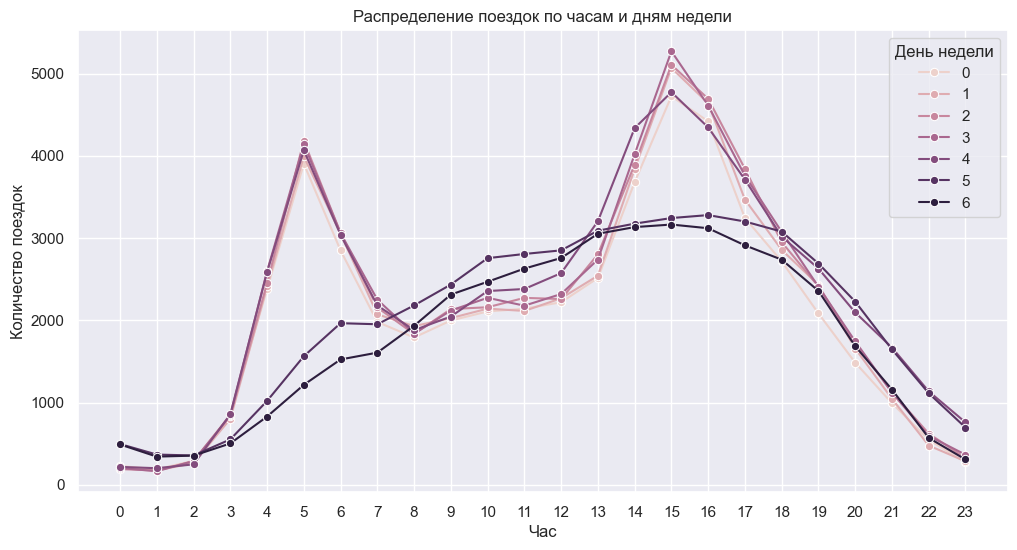

In [18]:
# распределение поездок по часам и дням недели

plt.figure(figsize=(12,6))
sns.lineplot(data=agg_h_d, x='hour', y='rides', hue='day_of_week', marker='o')
plt.title('Распределение поездок по часам и дням недели')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(0,24))
plt.legend(title='День недели')
plt.show()

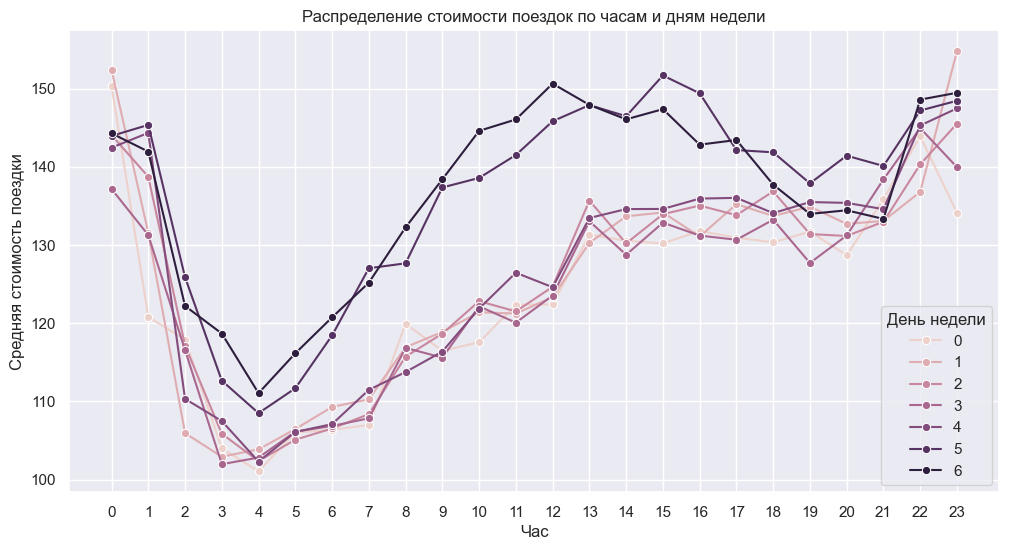

In [19]:
# распределение стоимости поездок по часам и дням недели

plt.figure(figsize=(12,6))
sns.lineplot(data=agg_h_d, x='hour', y='avg_price', hue='day_of_week', marker='o')
plt.title('Распределение стоимости поездок по часам и дням недели')
plt.xlabel('Час')
plt.ylabel('Средняя стоимость поездки')
plt.xticks(range(0,24))
plt.legend(title='День недели')
plt.show()

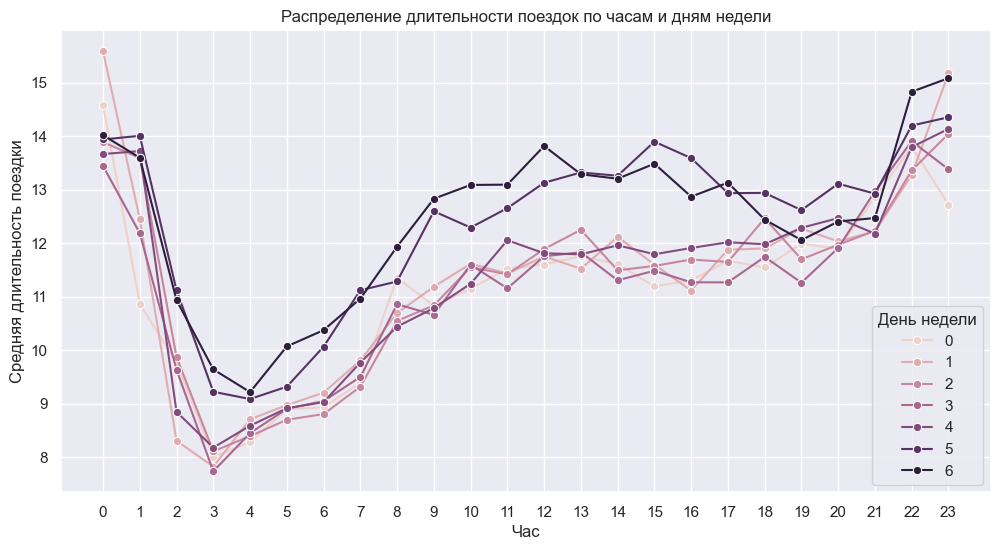

In [20]:
# распределение длительности поездок по часам и дням недели

plt.figure(figsize=(12,6))
sns.lineplot(data=agg_h_d, x='hour', y='avg_duration', hue='day_of_week', marker='o')
plt.title('Распределение длительности поездок по часам и дням недели')
plt.xlabel('Час')
plt.ylabel('Средняя длительность поездки')
plt.xticks(range(0,24))
plt.legend(title='День недели')
plt.show()

**Анализ временных паттернов:**

*"Данные охватывают период с 2024-04-07 14:57:01 по 2024-10-21 17:18:07".*

- Распределение по часам:
    - В будние дни видно два чётких пика: **утренний (5-6 утра)** и мощный **вечерний (15-17 часов)**. Люди едут на работу/учёбу и обратно.
    - В выходные утренний пик исчезает, активность нарастает плавно к середине дня, оставаясь высокой дольше.
    - Несмотря на то, что поездок ночью (с 0 до 4 утра) мало, их **средняя стоимость зашкаливает**. Скорее всего, причина — отсутствие альтернатив. Общественный транспорт не ходит, такси ночью дорогое, и самокат становится основным средством передвижения.
- Распределение по дням:
    - Активность постепенно растёт с понедельника, достигая **пика в пятницу**.
    - В выходные наблюдается снижение количества поездок. При этом **чек в выходные выше** — в субботу и воскресенье кривая средней стоимости (второй график) стабильно идёт выше будничных линий. Люди едут дольше и дальше, не торопясь в офис, что делает их более выгодными клиентами для сервиса.
- Распределение по месяцам:
    - Анализ показывает ярко выраженную сезонность использования сервиса. Существенный рост количества поездок начинается в июне, достигает **пика в августе-сентябре** и постепенно снижается к октябрю.
    - Отдельно стоит отметить низкие значения в апреле и мае. Согласно официальной информации, опубликованной Т-Банком 4 июня 2024 года, запуск сервиса "Самокаты" происходил в тестовом режиме, а первым партнёром стала компания Юрент. Это объясняет ограниченное количество поездок.

**Вывод:** при планировании логистики и маркетинговых активностей важно учитывать сезонные колебания — усиливать промо в периоды естественного спада и повышать готовность инфраструктуры в периоды пиков.

---

### Сегментация пользователей

Рассчитаем количество уникальных пользователей:

In [21]:
# уникальных пользователей
unique_users = df['party_rk'].nunique()

print(f"Уникальных пользователей: {unique_users}")

Уникальных пользователей: 57532


Количество уникальных пользователей (а оно меньше количества записей) говорит о наличии постоянных пользователей сервиса.

Создадим датасет, в котором оставим только уникальные идентификаторы пользователей:

In [22]:
user_df = df.drop_duplicates(subset='party_rk').reset_index(drop=True)
user_df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,avg_speed_kmh,cashback_rate_rub,cashback_rate_bns,hour,day_of_week,month,effective_minute_cost,duration_int,dow_name,month_name
0,252618395,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,0.070,2024-04-17 10:43:29,2024-04-17 10:43:34.133897,2024-04-17 10:45:22.547000,3,2024-04-17 10:43:34.133897,64.98,0.0,0.0,1.807,2.317,0.000,0.0,10,2,4,35.962,2.0,Wednesday,April
1,252632694,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,0.046,2024-04-17 16:47:59,2024-04-17 16:48:04.538852,2024-04-17 16:49:47.783760,3,2024-04-17 16:48:04.538852,65.98,0.0,0.0,1.721,1.617,0.000,0.0,16,2,4,38.344,2.0,Wednesday,April
2,252629528,21817314,F,30,GRD,UNM,МОСКОВСКАЯ ОБЛ,7.49,50.0,300.0,SL,0.055,2024-04-19 10:32:08,2024-04-19 10:32:15.964200,2024-04-19 10:38:11.978319,3,2024-04-19 10:32:15.964200,94.94,0.0,0.0,5.934,0.558,0.000,0.0,10,4,4,16.000,6.0,Friday,April
3,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,SL,0.238,2024-04-22 15:46:04,2024-04-22 15:46:10.062458,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,0.0,8.899,1.604,0.008,0.0,15,0,4,13.699,9.0,Monday,April
4,252621809,145875613,M,35,GRD,DIV,Г МОСКВА,7.99,50.0,300.0,SL,0.282,2024-04-22 15:46:53,2024-04-22 15:47:00.283797,2024-04-22 15:56:28.643724,3,2024-04-22 15:47:00.283797,129.90,1.0,0.0,9.473,1.787,0.008,0.0,15,0,4,13.713,9.0,Monday,April


#### Сегментация по возрасту

Сегментируем возраст пользователей на логические группы, чтобы выявить **портрет пользователя**:

In [23]:
user_df['age_group'] = pd.cut(
    user_df['age'],
    bins=[0, 17, 25, 35, 45, 60, 100],
    labels=['18-', '18-25', '26-35', '36-45', '46-60', '60+']
)

Посмотрим на распределение возраста пользователей:

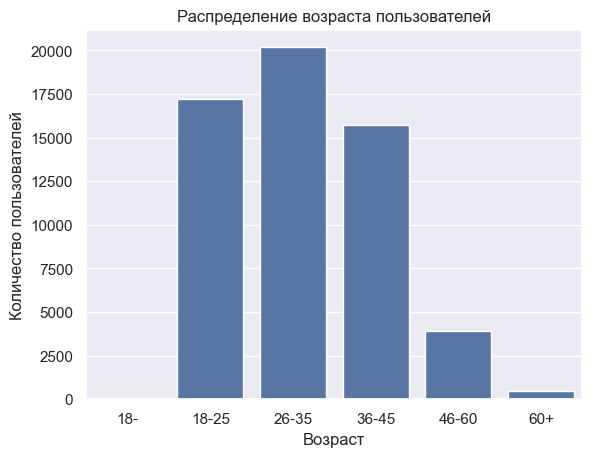

In [24]:
sns.countplot(data=user_df, x='age_group')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Рассмотрим распределение возраста в разрезе пола, чтобы выявить различия в структуре потребления между мужчинами и женщинами внутри возрастных категорий:

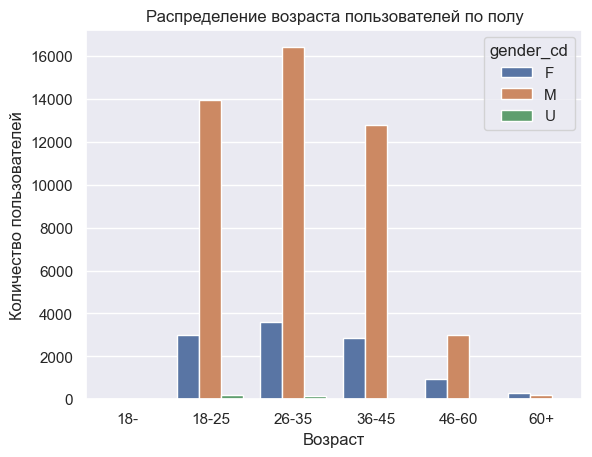

In [25]:
sns.countplot(
    data=user_df,
    x='age_group',
    hue='gender_cd'
)
plt.title('Распределение возраста пользователей по полу')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

**Наблюдения:**

1. Ядром аудитории являются мужчины в возрасте 26-35 лет.
2. Мужская аудитория значительно превышает женскую.
3. Группы `18-25` и `36-45` также активны, что говорит о широком охвате трудоспособного населения.

#### Сегментация по региону проживания

Проверим, в каких городах чаще всего пользуются самокатами с 5 до 7 утра (5:00 - 6:59):

In [26]:
df[['lvn_state_nm', 'hour']].query('hour in (5, 6)').value_counts().head()

lvn_state_nm       hour
Г МОСКВА           5       5946
                   6       4884
Г САНКТ-ПЕТЕРБУРГ  5       2742
МОСКОВСКАЯ ОБЛ     5       2501
СВЕРДЛОВСКАЯ ОБЛ   5       2052
Name: count, dtype: int64

Скорее всего, утренний всплеск поездок связан с необходимостью добраться на работу или учёбу в крупных городах (в основном, в будние дни).

In [27]:
print(f"Количество уникальных регионов: {df.lvn_state_nm.nunique()}")

Количество уникальных регионов: 205


In [28]:
# топ-10 регионов по количеству поездок
df['lvn_state_nm'].value_counts().reset_index().head(10)

,lvn_state_nm,count
0,Г МОСКВА,82451
1,МОСКОВСКАЯ ОБЛ,36173
2,Г САНКТ-ПЕТЕРБУРГ,34205
3,Unknown,30918
4,СВЕРДЛОВСКАЯ ОБЛ,26486
5,КРАСНОДАРСКИЙ КРАЙ,14613
6,РЕСП ТАТАРСТАН,8743
7,РЕСП БАШКОРТОСТАН,7609
8,НИЖЕГОРОДСКАЯ ОБЛ,6879
9,НОВОСИБИРСКАЯ ОБЛ,6317


Активнее всего сервис используется в Москве и МО, в Санкт-Петербурге, в Свердловской области и в Краснодарском крае.

In [29]:
print(f"Доля Москвы и МО от всех поездок: {round(len(df.query("(lvn_state_nm == 'Г МОСКВА') | (lvn_state_nm == 'МОСКОВСКАЯ ОБЛ')")) / len(df) * 100, 2)}%")
print(f"Доля прибыли Москвы и МО: {round(df.query("(lvn_state_nm == 'Г МОСКВА') | (lvn_state_nm == 'МОСКОВСКАЯ ОБЛ')")['nominal_price_rub_amt'].sum() / df['nominal_price_rub_amt'].sum(), 2) * 100}%")

Доля Москвы и МО от всех поездок: 33.22%
Доля прибыли Москвы и МО: 34.0%


Поездки в Москве и Московской области занимают треть всех поездок и приносят треть выручки.

`lvn_state_nm` — регион проживания клиента, что является информацией о клиенте. Посмотрим на распределение клиентов по регионам:

In [30]:
user_df.groupby('lvn_state_nm', observed=True).agg(users=('party_rk', 'count')).sort_values(by='users', ascending=False).head(10)

,users
lvn_state_nm,
Г МОСКВА,10748
Unknown,5517
МОСКОВСКАЯ ОБЛ,5451
Г САНКТ-ПЕТЕРБУРГ,5027
СВЕРДЛОВСКАЯ ОБЛ,2997
КРАСНОДАРСКИЙ КРАЙ,1988
РЕСП ТАТАРСТАН,1610
РЕСП БАШКОРТОСТАН,1430
НИЖЕГОРОДСКАЯ ОБЛ,1327


Больше всего пользователей проживает в Москве, МО и Санкт-Петербурге. Информация о регионе проживания 5500 пользователей помечена как неизвестная.

In [31]:
users_by_region = user_df.groupby('lvn_state_nm', observed=True).agg(users=('party_rk', 'count')).sort_values(by='users', ascending=False).head(10)
rides_by_region = df.groupby('lvn_state_nm', observed=True).agg(rides=('order_rk', 'count'), revenue=('nominal_price_rub_amt', 'sum')).sort_values(by='rides', ascending=False).head(10)

region_df = users_by_region.merge(rides_by_region, how="inner", on='lvn_state_nm')

region_df['rides_per_users'] = region_df['rides'] / region_df['users']
region_df['revenue_per_users'] = region_df['revenue'] / region_df['users']

region_df.style.format({'revenue': '{:,.0f}'})

,users,rides,revenue,rides_per_users,revenue_per_users
lvn_state_nm,,,,,
Г МОСКВА,10748,82451,"10,818,413",7.671288,1006.551265
Unknown,5517,30918,"3,993,114",5.604133,723.783669
МОСКОВСКАЯ ОБЛ,5451,36173,"4,748,930",6.636030,871.203541
Г САНКТ-ПЕТЕРБУРГ,5027,34205,"4,355,968",6.804257,866.514422
СВЕРДЛОВСКАЯ ОБЛ,2997,26486,"2,778,249",8.837504,927.010093
КРАСНОДАРСКИЙ КРАЙ,1988,14613,"1,873,389",7.350604,942.348592
РЕСП ТАТАРСТАН,1610,8743,"1,006,167",5.430435,624.948486
РЕСП БАШКОРТОСТАН,1430,7609,"938,867",5.320979,656.550656
НИЖЕГОРОДСКАЯ ОБЛ,1327,6879,"887,357",5.183873,668.694329


**Наблюдения:**

1. Москва имеет максимальный доход на одного пользователя (>1000 руб.) при стабильно высокой частоте поездок. Основной генератор прибыли.
2. Свердловская область и Краснодарский край имеют высокий доход на одного пользователя и высокую частоту поездок.
3. Татарстан, Башкортостан, Нижегородская область: низкая частота (5.2 - 5.4 поездки на пользователя) и доходность соответственно. Эти регионы требует пересмотра маркетинговой стратегии для повышения Retention.

**Бизнес-инсайт:** если увеличить частоту использования в регионах с текущих 5-6 поездок до 7, при сохранении среднего чека потенциальный **прирост выручки** может составить порядка **1.5 млн рублей** за сезон (до 2.5 млн с учётом поездок с неопределённым регионом) без привлечения новых пользователей.

#### Сегментация по моделям самокатов

Распределение моделей самокатов по поездкам:

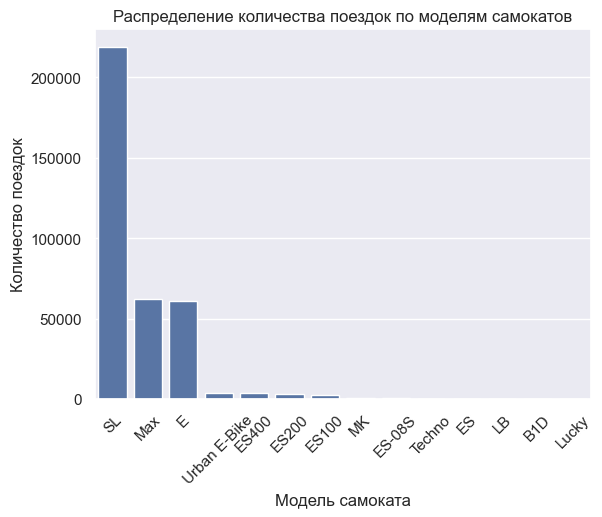

transport_model
SL              218848
Max              62017
E                61195
Urban E-Bike      3909
ES400             3706
ES200             2918
ES100             2425
MK                 952
ES-08S             736
Techno             200
ES                  91
LB                  82
B1D                 30
Lucky                1
Name: count, dtype: int64


In [32]:
sns.countplot(data=df, x='transport_model', order=df['transport_model'].value_counts().index)
plt.title("Распределение количества поездок по моделям самокатов")
plt.xlabel("Модель самоката")
plt.xticks(rotation=45)
plt.ylabel("Количество поездок")
plt.show()
print(df['transport_model'].value_counts())

Популярные модели самокатов:
- SL;
- Max;
- E.

#### Сегментация по социальным признакам

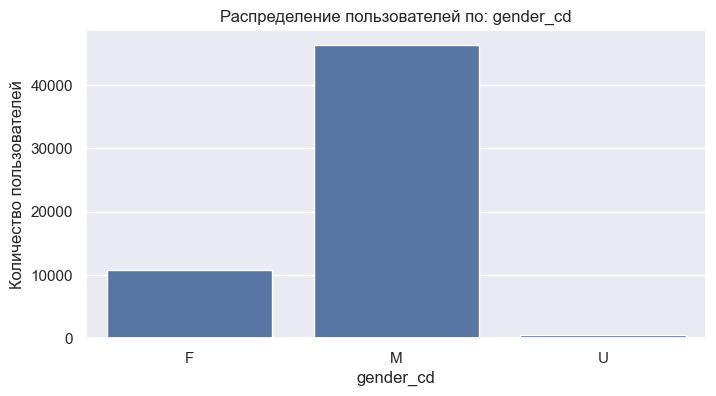

gender_cd
M    46372
F    10719
U      441
Name: count, dtype: int64


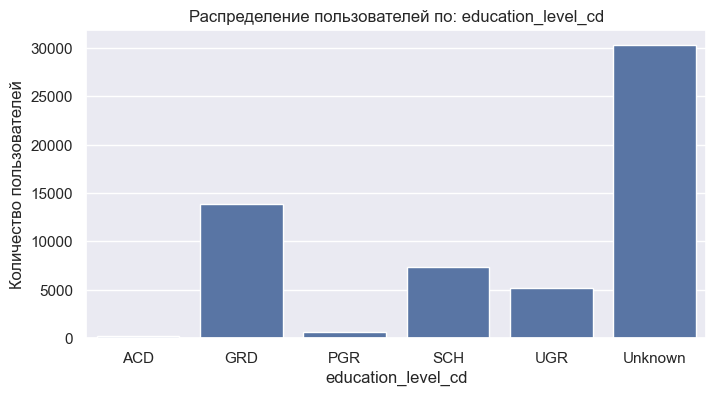

education_level_cd
Unknown    30343
GRD        13822
SCH         7300
UGR         5201
PGR          658
ACD          208
Name: count, dtype: int64


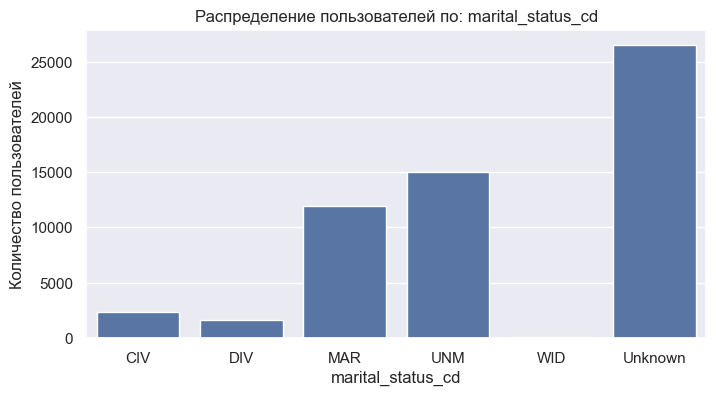

marital_status_cd
Unknown    26545
UNM        14990
MAR        11930
CIV         2308
DIV         1650
WID          109
Name: count, dtype: int64


In [33]:
category_columns = ['gender_cd', 'education_level_cd', 'marital_status_cd']

for col in category_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=user_df, x=col)
    plt.title(f"Распределение пользователей по: {col}")
    plt.xlabel(col)
    plt.ylabel("Количество пользователей")
    plt.show()
    print(user_df[col].value_counts())

**Анализ:**

- Мужчины составляют около **80%** пользователей.
- У многих клиентов неизвестны следующие признаки: уровень образования и семейное положение.

#### Сегментация по активности

In [34]:
# метрики для каждого пола

df.groupby(by='gender_cd', observed=True).agg(
                        rides=('order_rk','count'),
                        avg_price=('nominal_price_rub_amt','mean'),
                        avg_distance=('distance_km','mean'),
                        avg_trip_duration_min=('trip_duration_min','mean')
).sort_values('rides', ascending=False)

,rides,avg_price,avg_distance,avg_trip_duration_min
gender_cd,,,,
M,301828,126.241,2.429,11.207
F,52624,139.161,2.446,12.759
U,2658,119.254,1.843,9.901


По распределению видно, что:

- поездок мужчинами сделано значительно больше, чем женщинами (обусловлено количеством пользователей);
- средняя стоимость поездки у женщин выше при примерно одинаковой дистанции — **139.16₽** против **126.24₽** у мужчин.

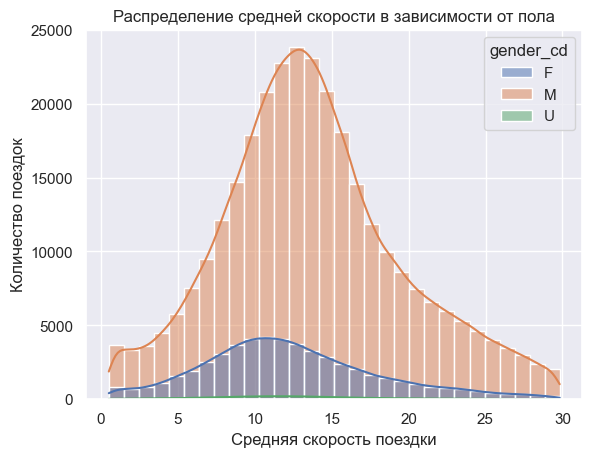

avg_speed_kmh        
                   mean  median
gender_cd                      
F                12.349  11.704
M                13.746  13.248
U                12.376  11.918

In [35]:
# распределение средней скорости по полу

sns.histplot(data=df, x='avg_speed_kmh', hue='gender_cd', bins=30, kde=True, color='blue')
plt.title("Распределение средней скорости в зависимости от пола")
plt.xlabel("Средняя скорость поездки")
plt.ylabel("Количество поездок")
plt.show()

df.groupby(by='gender_cd', observed=True).agg({'avg_speed_kmh': ['mean', 'median']})

Разная средняя и медианная скорость у мужчин и женщин — очень важный **инсайт** для объяснения различий в средней стоимости и длительности поездок. Видно, женщины катаются осторожнее.

In [36]:
gen_agg = df.groupby(by='gender_cd', observed=True).agg(
    users=('party_rk', 'nunique'),
    rides=('order_rk', 'count')
)
gen_agg

,users,rides
gender_cd,,
F,10719,52624
M,46372,301828
U,441,2658


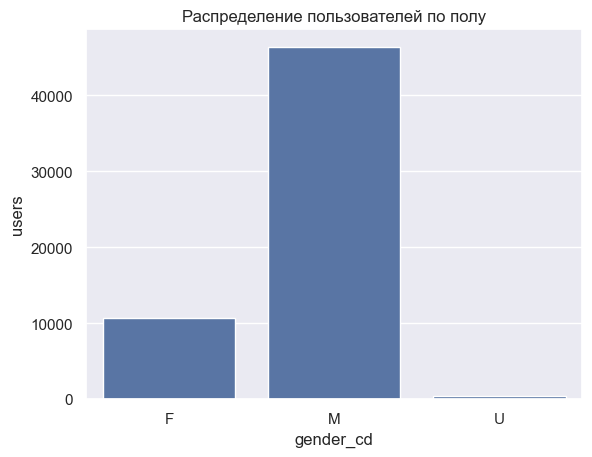

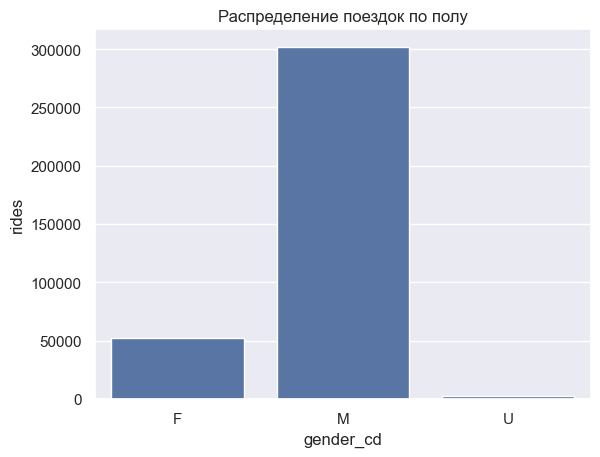

In [37]:
sns.barplot(data=gen_agg['users'])
plt.title('Распределение пользователей по полу')
plt.show()

sns.barplot(data=gen_agg['rides'])
plt.title('Распределение поездок по полу')
plt.show()

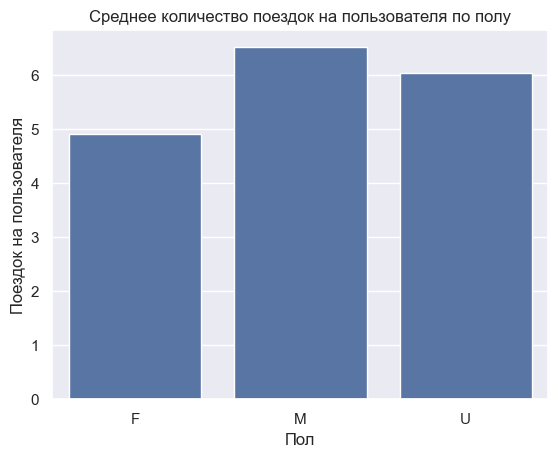

In [38]:
rides_per_user = gen_agg['rides'] / gen_agg['users']
sns.barplot(x=rides_per_user.index, y=rides_per_user.values)
plt.title('Среднее количество поездок на пользователя по полу')
plt.xlabel('Пол')
plt.ylabel('Поездок на пользователя')
plt.show()

In [39]:
print(f"Количество поездок на мужчину: {rides_per_user['M']}")
print(f"Количество поездок на женщину: {rides_per_user['F']}")

Количество поездок на мужчину: 6.508841542310015
Количество поездок на женщину: 4.909413191529061


In [40]:
print(f"Мужчины в среднем совершают на {round(rides_per_user['M']/rides_per_user['F'] * 100 - 100, 2)}% больше поездок на пользователя, чем женщины.")

Мужчины в среднем совершают на 32.58% больше поездок на пользователя, чем женщины.


Наблюдается различие в количестве поездок на пользователя между мужчинами и женщинами.

**Анализ:**

- Большинство пользователей — мужчины (около 80%).
- Стоимость поездки при примерно одинаковой дистанции у женщин выше, чем у мужчин.
- Мужчины совершают больше поездок на пользователя, чем женщины (6.51 против 4.91).

**Вывод:** мужская аудитория не только превосходит количественно, но и является более активной в плане повторных поездок. Женский сегмент имеет больший потенциал для роста частоты использования (Retention).

> **Бизнес-рекомендация:** исследовать барьеры, мешающие женщинам использовать самокат ежедневно (безопасность маршрутов, удобство парковок, наличие подписки).

---

### Формулировка гипотез

На основе проведённого анализа данных для дальнейшей статистической проверки были выдвинуты следующие гипотезы:

**Гипотеза 1.** Средний чек у женщин статистически значимо выше, чем у мужчин. _Бизнес-смысл:_ если это так, женщины — финансово ценный сегмент, удержание критично.

**Гипотеза 2.** Среднее число поездок на пользователя в мужском сегменте статистически значимо выше, чем в женском (Frequency / Retention по полу). _Бизнес-смысл:_ нужно работать над возвращаемостью / удержанием женской аудитории.

**Гипотеза 3.** Средняя выручка с поездки в выходные выше, чем в будни. _Бизнес-смысл:_ если это так, есть почва для специальных тарифов.

**Гипотеза 4.** Средний чек ночных поездок статистически значимо выше, чем средний чек дневных поездок (ночью поездок мало, но они самые дорогие). _Бизнес-смысл:_ если это так, можно обсуждать повышенный тариф / специальные предложения.

**Гипотеза 5.** Несмотря на потенциально более высокий средний чек у женщин (AOV), общая пожизненная ценность клиента (LTV) или средняя выручка на пользователя за сезон (ARPU) выше в мужском сегменте за счёт частоты поездок. _Бизнес-смысл:_ мужчины остаются ценным и ключевым сегментом прибыли.

**Гипотеза 6.** Средняя скорость движения у мужчин статистически значимо выше, чем у женщин. _Бизнес-смысл:_ может влиять на аварийность, износ техники и операционные затраты.

**Гипотеза 7.** Частота поездок на одного пользователя статистически различается между регионами. _Бизнес-смысл:_ если различия значимы, это сигнал к пересмотру логистики и маркетинга в отстающих зонах (промо-акции).

**Гипотеза 8.** В выходные дни средняя длительность поездки выше, чем в будние. _Бизнес-смысл:_ в выходные самокаты приносят деньги за счёт времени.

**Гипотеза 9.** Пользователи, у которых преобладают короткие поездки (до 7 минут), совершают меньше поездок на пользователя по сравнению с теми, кто чаще ездит дольше (имеют более низкий коэффициент удержания Retention). _Бизнес-смысл:_ если это так, высокая цена коротких поездок (а именно стоимость активации) отпугивает людей, что может являться барьером к повторному использованию.

---

### Выводы по исследовательскому анализу данных

- Сервис имеет ярко выраженное мужское ядро (80% базы), которое демонстрирует более высокую частоту использования (**6,5** против **4,9** поездки на пользователя). Женский сегмент, хотя и менее активен, показывает более высокий средний чек (**+10%**).
- Выявлен значительный вклад стоимости активации в итоговую цену. Реальная стоимость минуты в среднем составляет **14.4 рублей**, что почти вдвое выше номинального тарифа. Короткие поездки (**до 7 минут**) являются **самыми маржинальными** для компании.
- Подтверждены некоторые сценарии использования самокатов: транспортный (утренний и вечерний пик в будние дни) и прогулочный (выходные дни). Ночные поездки характеризуются аномально высоким средним чеком при низком объёме трафика.
- Москва — однозначный лидер по выручке (средний **ARPU** превышает **1000 рублей**), но Екатеринбург (Свердловская обл.) — лидер по лояльности (максимальное число поездок на пользователя — **8,8**). Выявлен потенциал роста выручки на **1.5-2.5 млн. рублей** за счёт выравнивания частоты поездок в отстающих регионах до целевого уровня (7 поездок).

На основе EDA сформировано 9 статистических гипотез, охватывающих гендерные различия, юнит-экономику и региональную специфику. Данные гипотезы станут основой для следующего этапа работы, где с помощью статистических критериев и SQL-запросов будут даны финальные рекомендации для бизнеса.